In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Regression\\ASPRS\\2020'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/2020/S2Data2020.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

      Year  Month  Day      2BDA      3BDA        B1       B10       B11  \
0     2020      5    2  0.942550 -0.052425  0.107790  0.000966  0.012200   
1     2020      5    2  0.880468 -0.070505  0.123317  0.001900  0.009190   
2     2020      5    2  0.912888 -0.084626  0.114103  0.002566  0.014697   
3     2020      5    2  1.185505  0.197659  0.120355  0.005414  0.075069   
4     2020      5    2  0.856363 -0.130301  0.108486  0.000866  0.005728   
...    ...    ...  ...       ...       ...       ...       ...       ...   
9318  2020     10   30  0.853926 -0.129055  0.152807  0.001676  0.008662   
9319  2020     10   30  1.077396  0.061427  0.126659  0.001469  0.014217   
9320  2020     10   30  0.945077 -0.051659  0.134852  0.007321  0.018221   
9321  2020     10   30  0.961857 -0.039219  0.132445  0.007393  0.022983   
9322  2020     10   30  0.959639 -0.039047  0.126638  0.006003  0.016324   

           B12        B2  ...        B4        B5        B6        B7  \
0     0.007134

In [5]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/2020/FieldData2020.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

      Lake Name          Y          X       Date  Year  Month  Day    Chl-a
0     Java Lake  42.631302 -78.343903   6/7/2020  2020      6    7   3.2100
1     Java Lake  42.631302 -78.343903  6/25/2020  2020      6   25   0.2798
2     Java Lake  42.631302 -78.343903  7/13/2020  2020      7   13  31.0800
3     Java Lake  42.631302 -78.343903  7/26/2020  2020      7   26  65.6000
4     Java Lake  42.631302 -78.343903  8/10/2020  2020      8   10  31.7400
...         ...        ...        ...        ...   ...    ...  ...      ...
1222  Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   8.1680
1223  Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   9.0480
1224  Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23  13.0880
1225  Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   7.7780
1226  Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20  11.0760

[1216 rows x 8 columns]


In [6]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/2020/MergedData.csv')
  
# displaying result
print(MergedData)

     Year  Month  Day      2BDA      3BDA        B1       B10       B11  \
0    2020      6    6  0.939841 -0.068468  0.124055  0.000838  0.020286   
1    2020      6    6  0.951670 -0.056738  0.117724  0.000945  0.015366   
2    2020      6    6  0.929507 -0.087916  0.117879  0.000976  0.014355   
3    2020      6    7  0.894041 -0.101839  0.125655  0.001593  0.016838   
4    2020      6    7  1.081297  0.101859  0.312979  0.010021  0.354248   
..    ...    ...  ...       ...       ...       ...       ...       ...   
504  2020      9   24  1.006106  0.007548  0.136534  0.007655  0.020848   
505  2020      9   27  0.985421 -0.017262  0.160810  0.001697  0.012845   
506  2020      9   27  0.948157 -0.054538  0.270976  0.003162  0.039348   
507  2020      9   30  0.906228 -0.089218  0.135859  0.001359  0.013124   
508  2020      9   30  1.049958  0.056706  0.190724  0.001834  0.167897   

          B12        B2  ...        B7        B8       B8A        B9  \
0    0.011210  0.092307  ..

In [7]:
# Descriptive statistics of all variables
list = ['2BDA', 'NDCI', 'Chl-a']

# get the summary
desc_mergeddata = MergedData [list].describe()

# add the standard deviation metric
desc_mergeddata.loc['+3_std'] = desc_mergeddata.loc['mean'] + (desc_mergeddata.loc['std'] * 3)
desc_mergeddata.loc['-3_std'] = desc_mergeddata.loc['mean'] - (desc_mergeddata.loc['std'] * 3)

# display it
desc_mergeddata

,2BDA,NDCI,Chl-a
count,509.000000,509.000000,509.000000
mean,1.001356,-0.003006,9.290794
std,0.128070,0.057979,16.925715
min,0.806335,-0.107215,0.168200
25%,0.918461,-0.042502,1.882600
50%,0.961619,-0.019566,3.380000
75%,1.061222,0.029702,8.400000
max,1.742914,0.270848,166.300000
+3_std,1.385567,0.170932,60.067939
-3_std,0.617146,-0.176943,-41.486351


In [8]:
# Pearson Coefficient 
corr = MergedData[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,NDCI,Chl-a
2BDA,1.000000,0.994760,0.395364
NDCI,0.994760,1.000000,0.395685
Chl-a,0.395364,0.395685,1.000000


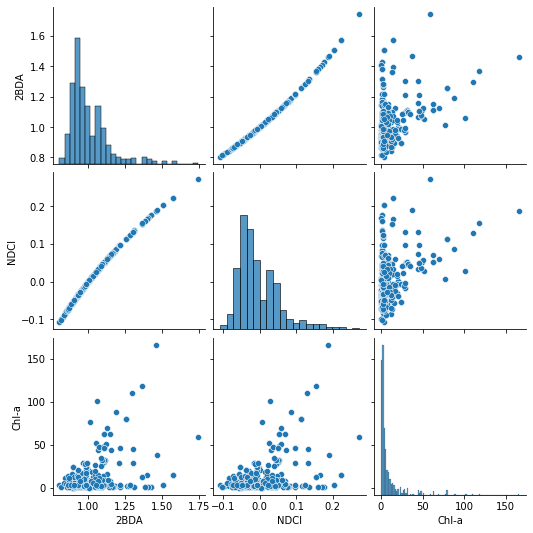

In [9]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData[list])

In [10]:
# Getting column names
X_columns = ["2BDA", "NDCI"]
Y = MergedData["Chl-a"]

In [12]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData[X_columns[0:2]].values, i) for i in range(MergedData[X_columns[0:2]].shape[1])]
vif["features"] = MergedData[X_columns[0:2]].columns

# display VIF
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,1.0,NDCI


In [13]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData[X_columns]
X = add_constant(X)
Y = MergedData['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     33.23
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           5.99e-14
Time:                        16:43:14   Log-Likelihood:                -1462.8
No. Observations:                 356   AIC:                             2932.
Df Residuals:                     353   BIC:                             2943.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6637     57.514      0.794      0.4

In [14]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)


predicted Y: 444    14.110181
344    13.584455
47      8.676022
67      6.725462
363    28.999624
         ...    
95      8.932841
122    10.339443
260     4.709102
23      9.921326
13     19.176507
Length: 153, dtype: float64


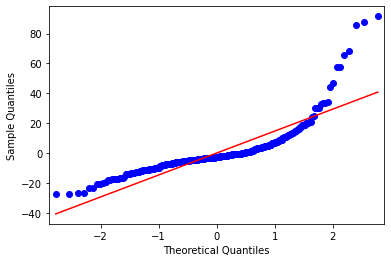

The mean of the residuals is -3.702e-15


In [15]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [16]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.99e+02
MAE 9.78
RMSE 17.3


In [17]:
# MergedData: Threshold  Chl-a < 2
MergedData1 = MergedData.loc[(MergedData["Chl-a"] > 2)]
MergedData1.shape

(363, 24)

In [18]:
# get the summary
desc_mergeddata1 = MergedData1 [list].describe()

# add the standard deviation metric
desc_mergeddata1.loc['+3_std'] = desc_mergeddata1.loc['mean'] + (desc_mergeddata1.loc['std'] * 3)
desc_mergeddata1.loc['-3_std'] = desc_mergeddata1.loc['mean'] - (desc_mergeddata1.loc['std'] * 3)

# display it
desc_mergeddata1

,2BDA,NDCI,Chl-a
count,363.000000,363.000000,363.000000
mean,1.006677,-0.000360,12.527344
std,0.128808,0.057941,19.112940
min,0.806335,-0.107215,2.008000
25%,0.921134,-0.041052,3.148000
50%,0.966796,-0.016882,5.366000
75%,1.066228,0.032053,12.668000
max,1.742914,0.270848,166.300000
+3_std,1.393102,0.173463,69.866165
-3_std,0.620252,-0.174183,-44.811476


In [19]:
# Pearson Coefficient 
corr1 = MergedData1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,2BDA,NDCI,Chl-a
2BDA,1.000000,0.994067,0.465035
NDCI,0.994067,1.000000,0.465846
Chl-a,0.465035,0.465846,1.000000


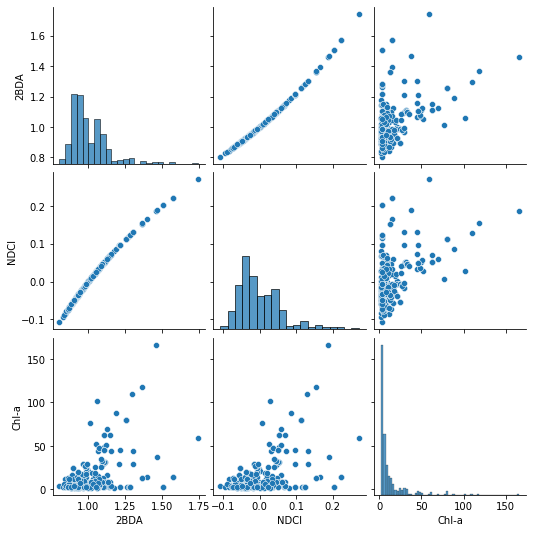

In [20]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData1[list])

In [21]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData1[X_columns]
X = add_constant(X)
Y = MergedData1['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     37.99
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           3.87e-15
Time:                        16:43:42   Log-Likelihood:                -1082.0
No. Observations:                 254   AIC:                             2170.
Df Residuals:                     251   BIC:                             2181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.6408     75.078     -1.101      0.2

In [22]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 413     5.131743
443    17.275528
161     7.756088
217    11.212488
277     4.265776
         ...    
289     8.877512
410    19.588033
378     5.003336
19     12.557668
34     19.952818
Length: 109, dtype: float64


In [23]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.7e+02
MAE 10.7
RMSE 16.4


In [24]:
# MergedData: Threshold  Chl-a < 8
MergedData2 = MergedData.loc[(MergedData["Chl-a"] > 8)]
MergedData2.shape

(134, 24)

In [25]:
# get the summary
desc_mergeddata2 = MergedData2 [list].describe()

# add the standard deviation metric
desc_mergeddata2.loc['+3_std'] = desc_mergeddata2.loc['mean'] + (desc_mergeddata2.loc['std'] * 3)
desc_mergeddata2.loc['-3_std'] = desc_mergeddata2.loc['mean'] - (desc_mergeddata2.loc['std'] * 3)

# display it
desc_mergeddata2

,2BDA,NDCI,Chl-a
count,134.000000,134.000000,134.000000
mean,1.060351,0.024592,27.135851
std,0.151542,0.064764,25.482840
min,0.843826,-0.084701,8.168000
25%,0.951720,-0.024737,11.436500
50%,1.034095,0.016762,16.383000
75%,1.107018,0.050791,31.460000
max,1.742914,0.270848,166.300000
+3_std,1.514976,0.218883,103.584370
-3_std,0.605727,-0.169699,-49.312668


In [26]:
# Pearson Coefficient 
corr2 = MergedData2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,2BDA,NDCI,Chl-a
2BDA,1.000000,0.993972,0.487004
NDCI,0.993972,1.000000,0.502570
Chl-a,0.487004,0.502570,1.000000


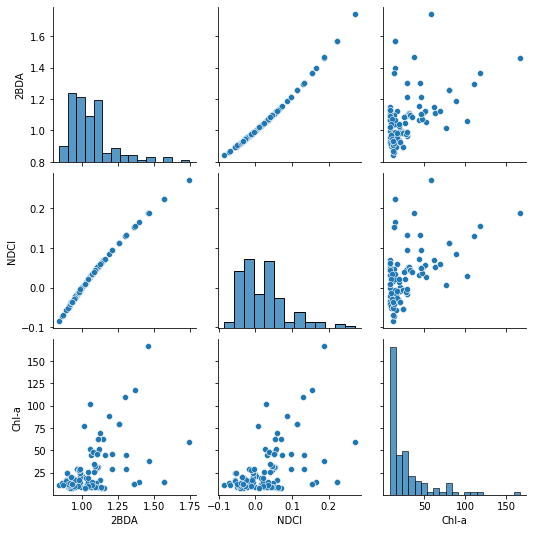

In [27]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData2[list])

In [28]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData2[X_columns]
X = add_constant(X)
Y = MergedData2['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     20.56
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           4.42e-08
Time:                        16:44:13   Log-Likelihood:                -420.50
No. Observations:                  93   AIC:                             847.0
Df Residuals:                      90   BIC:                             854.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.3091    134.096      1.546      0.1

In [29]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 216    14.376292
198    57.899627
404    32.692165
31     28.511322
300    13.394884
449    35.857460
266    40.124010
110    14.531630
256    39.110306
469    37.944352
313    18.873165
468    20.652402
220    15.519294
294    51.190485
400    26.675431
463    30.303318
192    20.960602
342    33.857757
486     2.383427
105     8.497819
246    21.913155
403    64.602694
236     1.382241
175    36.764988
24     20.448042
488    13.291519
467    20.933564
197    57.874550
265    42.148443
439    12.736089
213    32.742907
498    36.193206
476    22.679002
297    19.171995
301    11.190626
60     23.176238
11     36.981793
212    21.704222
455    29.955503
32     28.703123
372    58.020355
dtype: float64


In [30]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 4.47e+02
MAE 15.1
RMSE 21.1
